<strong>Little background info about neuron</strong>: The basic computational unit of the brain is a neuron. Approximately <strong>86 billion neurons</strong> can be found in the human nervous system and they are connected with approximately <strong>10^14 - 10^15 synapses</strong>. Each neuron receives input signals from its dendrites and produces output signals along its (single) axon, the nerve fiber. The axon eventually branches out and connects via synapses to dendrites of other neurons.<br> 
<br>
In the computational model of a neuron, the signals that travel along the axons (e.g. x0
x
0
) interact multiplicatively (e.g. w0x0
w
0
x
0
) with the dendrites of the other neuron based on the synaptic strength at that synapse (e.g. w0
w
0
). The idea is that the synaptic strengths (the weights w
w
) are learnable and control the strength of influence (and its direction: excitory (positive weight) or inhibitory (negative weight)) of one neuron on another. In the basic model, the dendrites carry the signal to the cell body where they all get <strong><span style='color:red'>summed</span></strong>. If the final sum is above a certain threshold, the neuron can fire, sending a spike along its axon. <br>
<br>
In the computational model, we assume that the precise timings of the spikes do not matter, and that only the frequency of the firing communicates information. Based on this rate code interpretation, we model the firing rate of the neuron with an <strong>activation function</strong>, which represents the frequency of the spikes along the axon. <strong>As we mentioned, a common choice of activation function is the sigmoid function, since it takes a real-valued input (the signal strength after the sum) and squashes it to range between 0 and 1, however RELU gains much popularity recently.</strong><br> 
<br> 
If you are interested in image recognition, please do check Andrej Karpathy, a legend in the deep learning area, he is especially specilized in ConvNets. Further you can also check other popular ConvNet like <a href='https://en.wikipedia.org/wiki/AlexNet'>AlexNets</a>, <a href='https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/googlenet.html'>GoogLeNets</a>, <a href='http://www.robots.ox.ac.uk/~vgg/practicals/cnn/index.html'> VGGNets</a>.   

Start how the neurons visualized by the computer, which is the way that computer see :) <br> 
Try image destructure by pixel through Excel 

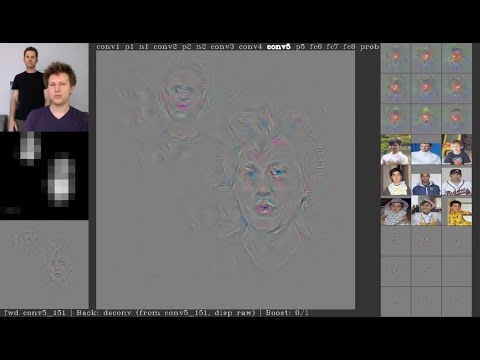

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('AgkfIQ4IGaM')  

Another interesting one is about object dection, from YOLO V3 https://pjreddie.com/darknet/yolo/ 

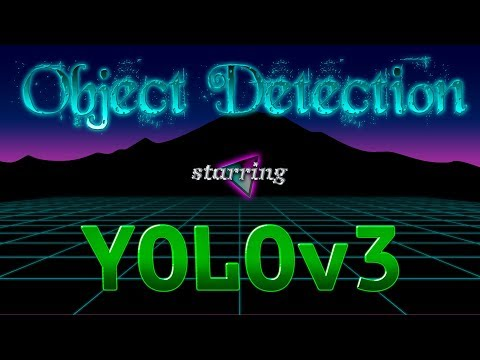

In [2]:
YouTubeVideo('MPU2HistivI') 

there are also interesting one like GAN. <br> 
The Dataset we used for this course, please download from Kaggle https://www.kaggle.com/zalando-research/fashionmnist 

- Fashion-MNIST is a dataset of <strong><span style='color: orange'>Zalando's</span></strong> article images—consisting of a <strong>training set of 60,000 examples</strong> and a <strong>test set of 10,000 examples</strong>. Each example is a <strong>28x28</strong> grayscale image, associated with a label from 10 classes. <a href='https://corporate.zalando.com/de'>Zalando</a> intends <a href='https://github.com/zalandoresearch/fashion-mnist'>Fashion-MNIST</a> to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.  
- <strong>Labels</strong> 0 T-shirt/top 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot  

In [3]:
#!kaggle datasets download -d zalando-research/fashionmnist

In [4]:
from IPython.core.interactiveshell import InteractiveShell    
import os
os.environ['HOME']+'/.kaggle/datasets/zalando-research/fashionmnist'

'/Users/chloe/.kaggle/datasets/zalando-research/fashionmnist'

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns
%matplotlib inline 
train=pd.read_csv('./desktop/fashionmnist/fashion-mnist_train.csv') 
test= pd.read_csv('./desktop/fashionmnist/fashion-mnist_test.csv')    

In [6]:
x_train_validate = train[list(train.columns)[1:]].values/255 #to standardize the data for rescaling 
y_train_validate = train['label'].values 
x_test= test[list(test.columns)[1:]].values/255
y_test= test['label'].values
print(x_train_validate.shape, x_test.shape, y_train_validate.shape, y_test.shape)   

(60000, 784) (10000, 784) (60000,) (10000,)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate= train_test_split(x_train_validate, 
                                                           y_train_validate, 
                                                           test_size=0.1, 
                                                           random_state=1234) 
print(x_train.shape, x_validate.shape, y_train.shape, y_test.shape)  

(54000, 784) (6000, 784) (54000,) (10000,)


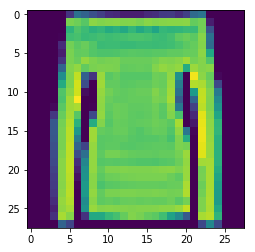

(54000, 784)

In [8]:
image= x_train[10000,:].reshape(28,28) 
plt.imshow(image) 
plt.show() 
x_train.shape 

build Convolution Neural Network (CNN) model 
- Keras !pip install keras https://keras.io/#installation 
- Tensorflow https://www.tensorflow.org/install/ 

In [9]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard 
from keras.callbacks import EarlyStopping 
from keras.utils import to_categorical 

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
#define the variable 
im_rows = 28
im_cols = 28
batch_size = 258
im_shape = (im_rows, im_cols, 1) 

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))  

x_train shape: (54000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (6000, 28, 28, 1)


In [11]:
#design the architecture, like the movie inception 
cnn_model = Sequential([
    Conv2D(filters=32, 
           kernel_size=(3,3), #the matrix that need to filter rows and columns of the image 
           activation='relu', #will explain you the relu in details 
           input_shape=im_shape), 
    MaxPooling2D(pool_size=2),
    Dropout(0.2), 
    Flatten(), 
    Dense(32, activation='relu'), 
    Dense(10, activation='softmax') 
])  

In [12]:
tensorboard = TensorBoard(
    log_dir='logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=10,
    write_images=True,
) 

In [13]:
cnn_model.compile(
    optimizer=Adam(lr=0.001), #Adam and learning rate
    loss='sparse_categorical_crossentropy', #categorical cross entropy 
    metrics=['accuracy']
)  

In [14]:
cnn_model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size,
    epochs=10, 
    verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 27s 499us/step - loss: 0.6336 - acc: 0.7840 - val_loss: 0.4352 - val_acc: 0.8398
Epoch 2/10
54000/54000 [==============================] - 27s 500us/step - loss: 0.3855 - acc: 0.8663 - val_loss: 0.3552 - val_acc: 0.8782
Epoch 3/10
54000/54000 [==============================] - 26s 485us/step - loss: 0.3441 - acc: 0.8793 - val_loss: 0.3355 - val_acc: 0.8817
Epoch 4/10
54000/54000 [==============================] - 27s 491us/step - loss: 0.3130 - acc: 0.8884 - val_loss: 0.3120 - val_acc: 0.8920
Epoch 5/10
54000/54000 [==============================] - 26s 479us/step - loss: 0.2969 - acc: 0.8949 - val_loss: 0.3005 - val_acc: 0.8958
Epoch 6/10
54000/54000 [==============================] - 26s 488us/step - loss: 0.2823 - acc: 0.9001 - val_loss: 0.2988 - val_acc: 0.8940
Epoch 7/10
54000/54000 [==============================] - 30s 558us/step - loss: 0.2703 - acc: 0.9041 - val_loss: 0.2

In [15]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('test loss: {:.2f}'.format(score[0]))
print(' test acc: {:.2f}'.format(score[1])) 

test loss: 0.26
 test acc: 0.91


In [16]:
cnn_model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [17]:
#based on the accuaracy, let's predicte some new images in the test datasets 
from IPython.core.interactiveshell import InteractiveShell
pred=cnn_model.predict_classes(x_test)  
print(pred)
print(pred.shape)     

[0 1 2 ... 8 8 1]
(10000,)


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 30s 549us/step - loss: 0.2367 - acc: 0.9136 - val_loss: 0.2672 - val_acc: 0.9060
Epoch 2/20
54000/54000 [==============================] - 31s 576us/step - loss: 0.2310 - acc: 0.9169 - val_loss: 0.2603 - val_acc: 0.9063
Epoch 3/20
54000/54000 [==============================] - 28s 516us/step - loss: 0.2255 - acc: 0.9178 - val_loss: 0.2586 - val_acc: 0.9103
Epoch 4/20
54000/54000 [==============================] - 28s 516us/step - loss: 0.2188 - acc: 0.9214 - val_loss: 0.2593 - val_acc: 0.9067
Epoch 5/20
54000/54000 [==============================] - 28s 526us/step - loss: 0.2120 - acc: 0.9240 - val_loss: 0.2561 - val_acc: 0.9127
Epoch 6/20
54000/54000 [==============================] - 29s 545us/step - loss: 0.2046 - acc: 0.9256 - val_loss: 0.2696 - val_acc: 0.9053
Epoch 7/20
54000/54000 [==============================] - 29s 530us/step - loss: 0.2006 - acc: 0.9274 - val_loss: 0.2

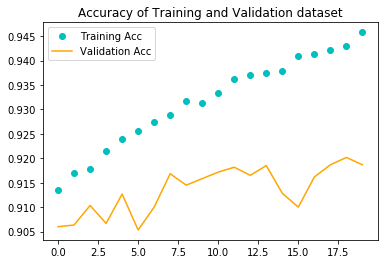

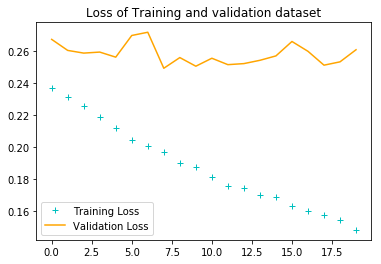

In [18]:
#History.history attribute is a record of training loss values and metrics values at successive epochs, 
#as well as validation loss values and validation metrics values 
History = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=20, 
    #the more epochs has more higher accuracy, I tried the epochs around 10, the accuracy is relatively not good
    #here need to understand how to tune the hyperparameters 
    verbose=1,
    validation_data=(x_validate,y_validate), 
)

#compare the training and validation datasets by the accuracy with the loss and metrics values with model we just trained 
accuracy = History.history['acc']
val_accuracy = History.history['val_acc']
loss = History.history['loss']
val_loss =History.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'co', label='Training Acc')
plt.plot(epochs, val_accuracy, 'orange', label='Validation Acc')
plt.title('Accuracy of Training and Validation dataset') 
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'c+', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Loss of Training and validation dataset')
plt.legend()
plt.show()   

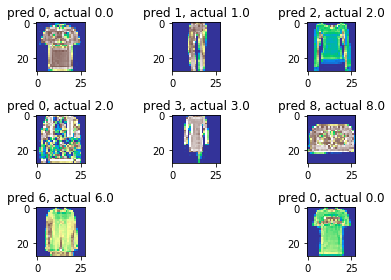

In [52]:
y_pred = cnn_model.predict_classes(x_test) 
y_test = test[:, 0] 

correct = np.nonzero(pred==y_test)[0]
incorrect = np.nonzero(pred!=y_test)[0]

for i, correct in enumerate(correct[:9]): 
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), 
               cmap='terrain', 
               interpolation= 'none')
    plt.title("pred {}, actual {}".format(y_pred[correct], y_test[correct]))
    plt.tight_layout()   

visualization with PCA #for the feature extraction, it's especially cool to visualize  

In [21]:
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data   

In [30]:
embed_count = 800           
test=np.array(pd.read_csv('./desktop/fashionmnist/fashion-mnist_test.csv'),dtype='float32')   
x_test_tf = test[:embed_count, 1:] / 255
y_test_tf = test[:embed_count, 0]
print(x_test_tf)
print(y_test_tf) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 1. 2. 2. 3. 2. 8. 6. 5. 0. 3. 4. 4. 6. 8. 5. 6. 3. 6. 4. 4. 4. 2. 1.
 5. 7. 8. 4. 4. 1. 5. 7. 7. 8. 1. 0. 9. 8. 0. 8. 2. 0. 4. 6. 2. 0. 3. 3.
 2. 3. 2. 2. 9. 3. 0. 9. 9. 4. 6. 0. 4. 5. 4. 6. 1. 1. 0. 9. 5. 2. 7. 3.
 4. 6. 5. 7. 1. 6. 1. 4. 9. 8. 1. 2. 4. 8. 9. 4. 1. 6. 3. 4. 2. 2. 2. 6.
 4. 7. 7. 3. 9. 3. 9. 0. 8. 2. 3. 8. 2. 7. 5. 5. 3. 2. 7. 5. 0. 2. 7. 1.
 0. 5. 4. 4. 7. 0. 8. 5. 0. 3. 1. 7. 9. 4. 9. 6. 4. 4. 2. 4. 3. 3. 3. 2.
 2. 6. 0. 0. 1. 3. 4. 3. 3. 1. 9. 3. 3. 3. 9. 5. 6. 7. 7. 3. 2. 4. 0. 8.
 7. 2. 2. 8. 9. 0. 2. 4. 4. 5. 7. 9. 9. 1. 3. 9. 1. 5. 5. 6. 0. 7. 4. 9.
 1. 6. 0. 0. 0. 4. 0. 9. 0. 4. 2. 5. 5. 8. 6. 2. 1. 9. 0. 4. 7. 1. 9. 5.
 9. 0. 2. 8. 5. 7. 7. 3. 2. 4. 5. 7. 8. 1. 9. 5. 6. 2. 9. 7. 4. 0. 9. 2.
 1. 5. 7. 7. 0. 2. 4. 5. 3. 3. 8. 1. 6. 2. 4. 8. 6. 9. 8. 3. 3. 2. 4. 2.
 2. 9. 3. 9. 2. 8. 6. 8. 8. 2. 7. 2. 5. 5

In [49]:
#use tensorboard to turn the layer computation(black box) to flashlight layer, to visualize the graph 
#a python class to write data for tensorboard 
logdir='./desktop/fashionmnist/logdir'
writer = tf.summary.FileWriter(logdir) 
embedding_var = tf.Variable(x_test, name='fmnist_embedding')
config = projector.ProjectorConfig() 
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name
embedding.metadata_path = logdir+'metadata.tsv'
embedding.sprite.image_path = logdir+ 'image.png' 
embedding.sprite.single_image_dim.extend([28, 28])

writer = tf.summary.FileWriter(logdir + 'visualization') #save the check point 

projector.visualize_embeddings(writer, config)  

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sess, logdir+'model.ckpt',0)  
    
writer.add_graph(sess.graph)  

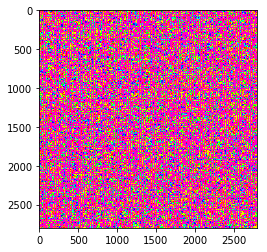

In [51]:
rows = 28
cols = 28
label = ['t_shirt', 'trouser', 
         'pullover', 'dress', 
         'coat','sandal', 
         'shirt', 'sneaker', 
         'bag', 'ankle_boot'] 
sprite_dim = int(np.sqrt(x_test.shape[0]))
sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))
index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        labels.append(label[int(y_test[index])])
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        index += 1 
        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gist_rainbow')
plt.imshow(sprite_image, cmap='gist_rainbow')
plt.show() 

image augmentation to move the noise, such as Gaussian/Speckle 